<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>
</center>

<h1 align=center><font size = 5>Explainable AI - Exercise</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 21, 2024</font>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report

pd.set_option('display.max_columns', None)

In [60]:
import shap
from lime.lime_tabular import LimeTabularExplainer

### Regression using XGBoost

Use the `concrete_data.csv` file to build a model that can automatically predict the compressive strength of some concrete based on its age and a few other features. 

In [61]:
concrete_df=pd.read_csv("datasets\concrete_data.csv")
concrete_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [62]:
X=concrete_df.drop(['CompressiveStrength'],axis=1)
y=concrete_df['CompressiveStrength']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
rf_regressor=RandomForestRegressor(random_state=42)
param_grid={
    'n_estimators':[3,30,100],
    'max_depth':[3,5,7]
}
grid_cv=GridSearchCV(estimator=rf_regressor,param_grid=param_grid,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
rf_regressor=grid_cv.best_estimator_
y_pred=rf_regressor.predict(X_test)
score_rf=rf_regressor.score(X_test,list(y_test))
score_rf

0.856534059155696

Use SHAP Analysis and LIME to interpret the model and understand the overall importance of the features in the dataset and why some specific predictions were made.

In [65]:
explainer_reg=shap.TreeExplainer(rf_regressor)

In [66]:
shap_value_reg=explainer_reg.shap_values(X_train)

In [67]:
mean_shap_value_reg=np.abs(shap_value_reg).mean(axis=0)

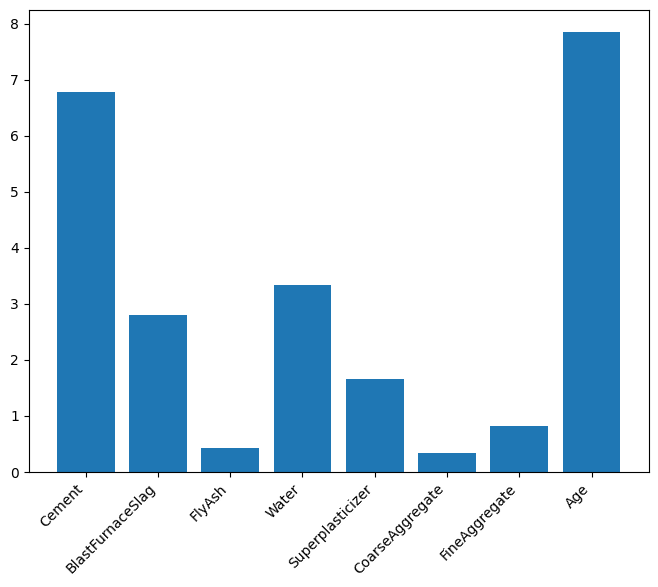

In [68]:
plt.figure(figsize=(8,6))
plt.bar(X_train.columns,mean_shap_value_reg)
plt.xticks(rotation=45, ha='right')
plt.show()

c:\Users\aleen\OneDrive\Desktop\DM_learn\DM_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


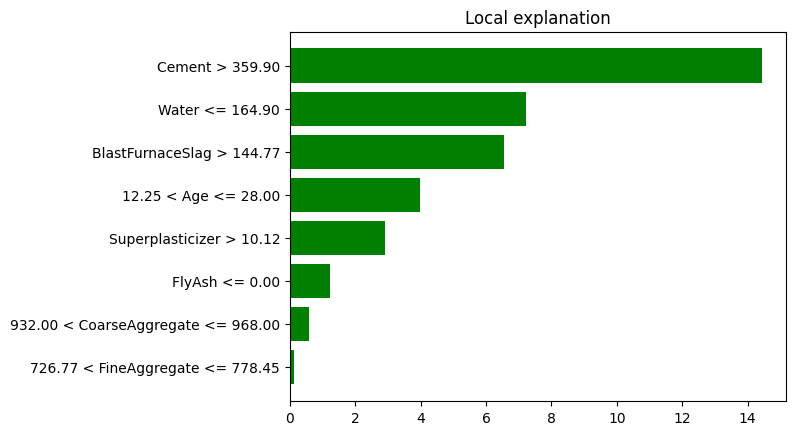

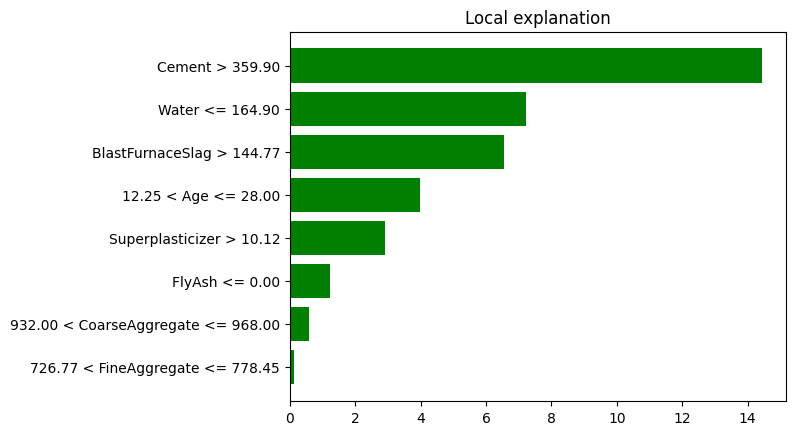

In [69]:
test_instance=X_test.iloc[2,:]
lime_explainer_reg=LimeTabularExplainer(X_train.values,feature_names=X_train.columns,mode="regression")
explanation_reg=lime_explainer_reg.explain_instance(test_instance.values,rf_regressor.predict)
explanation_reg.as_pyplot_figure()

In [70]:
test_instance

Cement              389.9
BlastFurnaceSlag    189.0
FlyAsh                0.0
Water               145.9
Superplasticizer     22.0
CoarseAggregate     944.7
FineAggregate       755.8
Age                  28.0
Name: 136, dtype: float64

### Classification using XGBoost

Use the `heart_disease_data.csv` file to build a model that can automatically predict whether a patient has heart disease or not.

In [71]:
heart=pd.read_csv('datasets/heart_disease_data.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [72]:
X=heart.drop(['target'],axis=1)
y=heart['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
xg_cls=XGBClassifier(random_state=42)
param_grid={
    'n_estimators':[5,20,80],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7]
}
xg_grid_cv=GridSearchCV(estimator=xg_cls,param_grid=param_grid,scoring='f1',cv=5)
xg_grid_cv.fit(X_train,y_train)
xg_cls_best=xg_grid_cv.best_estimator_


Use SHAP Analysis and LIME to interpret the model and understand the overall importance of the features in the dataset and why some specific predictions were made.

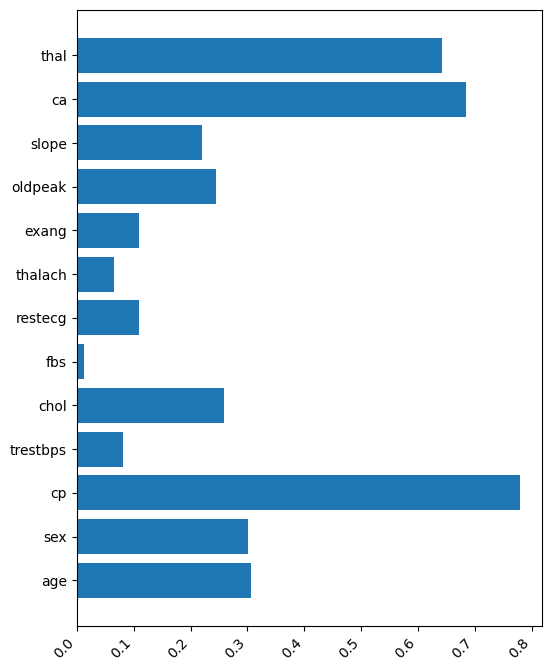

In [73]:
xg_explainer=shap.TreeExplainer(xg_cls_best)
xg_shap_values=xg_explainer.shap_values(X_train)
mean_xg_shap=np.abs(xg_shap_values).mean(axis=0)
plt.figure(figsize=(6,8))
plt.barh(X_train.columns,mean_xg_shap)
plt.xticks(rotation=45, ha='right')
plt.show()


In [74]:
test_instance=X_test.iloc[2,:]
test_instance

age          57.0
sex           1.0
cp            4.0
trestbps    110.0
chol        335.0
fbs           0.0
restecg       0.0
thalach     143.0
exang         1.0
oldpeak       3.0
slope         2.0
ca            1.0
thal          7.0
Name: 276, dtype: float64

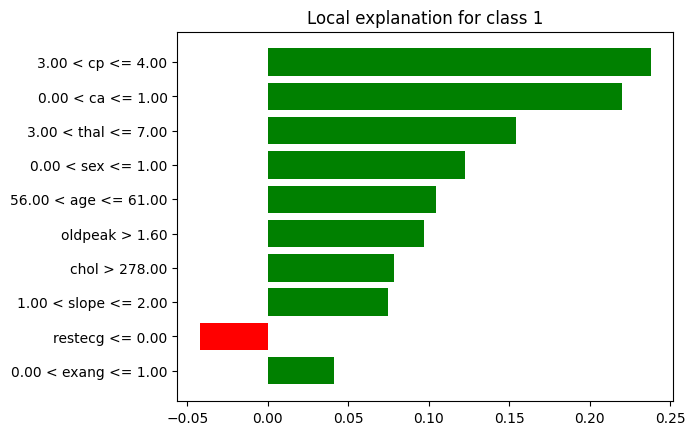

In [75]:
xg_explainer_lime=LimeTabularExplainer(X_train.values,feature_names=X_train.columns,mode="classification")
xg_explanation=xg_explainer_lime.explain_instance(test_instance.values,xg_cls_best.predict_proba)
xg_explanation.as_pyplot_figure();